In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dir = 'drive/MyDrive'

Mounted at /content/drive


In [ ]:
import pandas as pd
a1 = pd.read_csv(f'{dir}/aesop_gptj_annotate_JThomas.csv', index_col=0)
a2 = pd.read_csv(f'{dir}/aesop_gptj_annotate_NHankins.csv', index_col=0)
a3 = pd.read_csv(f'{dir}/aesop_gptj_annotate_ZSchultz.csv', index_col=0)

In [ ]:
a1.head(10)

,story,moral1,moral2,match_moral,match_story
0,There was once a little Kid whose growing horn...,Do not let anything turn you from your purpose.,A fool and his money are soon parted.,Yes,NaN
1,"The Tortoise, you know, carries his house on h...",Foolish curiosity and vanity often lead to mis...,The best of friends may disagree.,No,No
2,Why in the world do you walk sideways like tha...,Do not tell others how to act unless you can s...,"""How to walk"" is a great mystery.",No,Yes
3,An Ox came down to a reedy pool to drink. As h...,Do not attempt the impossible.,Do not puff yourself up.,Yes,NaN
4,"A Dog and a Cock, who were the best of friends...",Those who try to deceive may expect to be paid...,Do not trust a fox who has a good breakfast in...,No,Yes
5,The Mice once called a meeting to decide on a ...,It is one thing to say that something should b...,Don't be too hasty in your judgment of others.,No,No
6,"An Eagle, swooping down on powerful wings, sei...",Do not let your vanity make you overestimate y...,Do not boast of your own strength or abilities.,Yes,NaN
7,A Boy was given permission to put his hand int...,Do not attempt too much at once.,"Do not be a greedy child, but a satisfied one.",Yes,NaN
8,A Farmer was driving his wagon along a miry co...,Self help is the best help.,"When you are in trouble, do something.",Yes,NaN
9,A frisky young Kid had been left by the herdsm...,Do not say anything at any time that you would...,Do not be too quick to take offence.,No,Yes


In [ ]:
q1_r1 = a1['match_moral']
q1_r2 = a2['match_moral']
q1_r3 = a3['match_moral']

## Exact Agreement Between Three Annotators

In [ ]:
def exact_agreement(r1, r2, r3):
    num_agreements = 0
    num_ratings = len(r1)
    for i in range(num_ratings):
        if r1[i] == r2[i] == r3[i]:
            num_agreements += 1
    result = num_agreements / num_ratings
    return result, f"{round(result*100)}% exact agreement"

Question 1

> Please compare moral1 and moral2, then answer the following question:

> Do moral1 and moral2 express more-or-less the same meaning?


In [ ]:
exact_agreement(q1_r1, q1_r2, q1_r3)

(0.6394557823129252, '64% exact agreement')

In [ ]:
q2_r1 = a1['match_story'].fillna('Yes')
q2_r2 = a2['match_story'].fillna('Yes')
q2_r3 = a3['match_story'].fillna('Yes')

Question 2 *(if answered No to Q1*)

> Please read the corresponding story, then answer:

> Does moral2 make sense with the context?    

In [ ]:
exact_agreement(q2_r1, q2_r2, q2_r3)

(0.4217687074829932, '42% exact agreement')

In [ ]:
# made a combined file before continuing to kappa
import pandas as pd
all = pd.read_csv(f'{dir}/aesop_gptj_3annotators.csv')

In [ ]:
all.head()

,Unnamed: 0,story,original,generated,a1_match_moral,a1_match_story,a2_match_moral,a2_match_story,a3_match_moral,a3_match_story
0,0,There was once a little Kid whose growing horn...,Do not let anything turn you from your purpose.,A fool and his money are soon parted.,Yes,NaN,No,No,No,No
1,1,"The Tortoise, you know, carries his house on h...",Foolish curiosity and vanity often lead to mis...,The best of friends may disagree.,No,No,No,No,No,No
2,2,Why in the world do you walk sideways like tha...,Do not tell others how to act unless you can s...,"""How to walk"" is a great mystery.",No,Yes,No,No,No,No
3,3,An Ox came down to a reedy pool to drink. As h...,Do not attempt the impossible.,Do not puff yourself up.,Yes,NaN,No,No,No,Yes
4,4,"A Dog and a Cock, who were the best of friends...",Those who try to deceive may expect to be paid...,Do not trust a fox who has a good breakfast in...,No,Yes,No,No,No,Yes


In [ ]:
len(all) # verifying expected 147 entries exists

147

In [ ]:
all = all.fillna('Yes') # null answers to Q2 are considered 'Yes' (=generated moral matches context story)

In [ ]:
# verifying same conclusions as above are reached despite format change
exact_agreement(all['a1_match_moral'], all['a2_match_moral'], all['a3_match_moral'])

(0.6394557823129252, '64% exact agreement')

In [ ]:
exact_agreement(all['a1_match_story'], all['a2_match_story'], all['a3_match_story'])

(0.4217687074829932, '42% exact agreement')

## Confusion Matrices

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

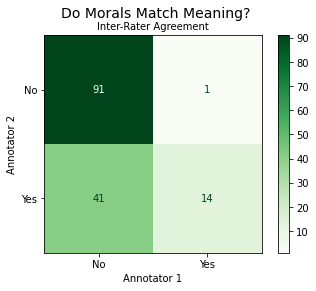

In [ ]:
m1 = confusion_matrix(all['a1_match_moral'], all['a2_match_moral'])
labels = ['No','Yes']
display = ConfusionMatrixDisplay(confusion_matrix=m1, display_labels=labels)
display.plot(cmap="Greens")
title = "Do Morals Match Meaning?"
subtitle = "Inter-Rater Agreement"
plt.suptitle(title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.xlabel('Annotator 1')
plt.ylabel('Annotator 2')
plt.show()

In [ ]:
def exact_agreement2(r1, r2):
    num_agreements = 0
    num_ratings = len(r1)
    for i in range(num_ratings):
        if r1[i] == r2[i]: #== r3[i]:
            num_agreements += 1
    print("Agreements", num_agreements)
    result = num_agreements / num_ratings
    return result, f"{round(result*100)}% exact agreement"
exact_agreement2(all['a1_match_moral'], all['a2_match_moral'])

Agreements 105


(0.7142857142857143, '71% exact agreement')

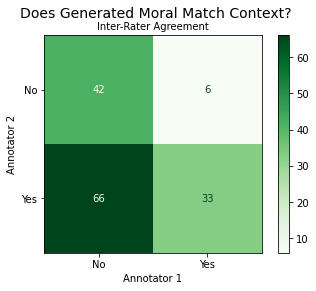

In [ ]:
m2 = confusion_matrix(all['a1_match_story'], all['a2_match_story'])
labels = ['No','Yes']
display = ConfusionMatrixDisplay(confusion_matrix=m2, display_labels=labels)
display.plot(cmap="Greens")
title = "Does Generated Moral Match Context?"
subtitle = "Inter-Rater Agreement"
plt.suptitle(title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.xlabel('Annotator 1')
plt.ylabel('Annotator 2')
plt.show()

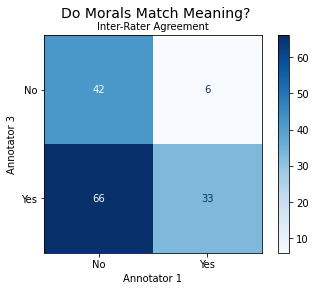

In [ ]:
m3 = confusion_matrix(all['a1_match_moral'], all['a3_match_moral'])
labels = ['No','Yes']
display = ConfusionMatrixDisplay(confusion_matrix=m2, display_labels=labels)
display.plot(cmap="Blues")
title = "Do Morals Match Meaning?"
subtitle = "Inter-Rater Agreement"
plt.suptitle(title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.xlabel('Annotator 1')
plt.ylabel('Annotator 3')
plt.show()

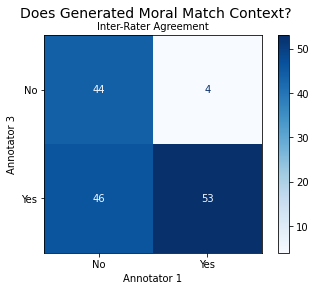

In [ ]:
m4 = confusion_matrix(all['a1_match_story'], all['a3_match_story'])
labels = ['No','Yes']
display = ConfusionMatrixDisplay(confusion_matrix=m4, display_labels=labels)
display.plot(cmap="Blues")
title = "Does Generated Moral Match Context?"
subtitle = "Inter-Rater Agreement"
plt.suptitle(title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.xlabel('Annotator 1')
plt.ylabel('Annotator 3')
plt.show()

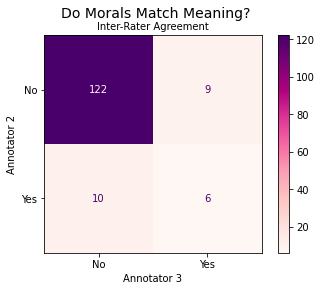

In [ ]:
m5 = confusion_matrix(all['a3_match_moral'], all['a2_match_moral'])
labels = ['No','Yes']
display = ConfusionMatrixDisplay(confusion_matrix=m5, display_labels=labels)
display.plot(cmap="RdPu")
title = "Do Morals Match Meaning?"
subtitle = "Inter-Rater Agreement"
plt.suptitle(title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.xlabel('Annotator 3')
plt.ylabel('Annotator 2')
plt.show()

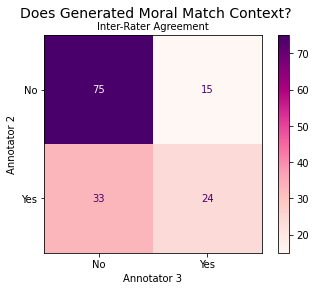

In [ ]:
m6 = confusion_matrix(all['a3_match_story'], all['a2_match_story'])
labels = ['No','Yes']
display = ConfusionMatrixDisplay(confusion_matrix=m6, display_labels=labels)
display.plot(cmap="RdPu")
title = "Does Generated Moral Match Context?"
subtitle = "Inter-Rater Agreement"
plt.suptitle(title, fontsize=14)
plt.title(subtitle, fontsize=10)
plt.xlabel('Annotator 3')
plt.ylabel('Annotator 2')
plt.show()

## Cohen's Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score

Question 1

Please compare moral1 and moral2, then answer the following question:

Do moral1 and moral2 express more-or-less the same meaning?


In [ ]:
# Q1 A1 vs A2
cohen_kappa_score(all['a1_match_moral'], all['a2_match_moral'])

0.28541666666666654

In [ ]:
# Q1 A1 vs A3
cohen_kappa_score(all['a1_match_moral'], all['a3_match_moral'])

0.23763973723637188

In [ ]:
# Q1 A2 vs A3
cohen_kappa_score(all['a2_match_moral'], all['a3_match_moral'])

0.3149374540103017

Question 2 (Only if answered No to Q1)

Please read the corresponding story, then answer:

Does moral2 make sense with the context?    

In [ ]:
# Q2 A1 vs A2
cohen_kappa_score(all['a1_match_story'], all['a2_match_story'])

0.15759312320916907

In [ ]:
# Q2 A1 vs A3
cohen_kappa_score(all['a1_match_story'], all['a3_match_story'])

0.3688820195775374

In [ ]:
# Q2 A2 vs A3
cohen_kappa_score(all['a2_match_story'], all['a3_match_story'])

0.27001862197392923

## Examine ratings

In [ ]:
# finding all entries where annotators agree the original moral matches the generated moral
ids = []
for i in range(147):
    if q1_r1[i] == q1_r2[i] == q1_r3[i]:
        ids.append(i)
print(ids)

[1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 31, 33, 35, 36, 42, 43, 44, 45, 46, 48, 52, 53, 54, 56, 57, 58, 59, 60, 64, 66, 67, 69, 70, 71, 75, 76, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 91, 92, 93, 95, 96, 97, 98, 99, 100, 102, 103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 120, 121, 122, 123, 127, 128, 129, 130, 131, 133, 135, 137, 141, 143]


In [ ]:
len(ids)

94

Experiment 2 Annotation Task

Please read each folktale and judge (yes or no) whether moral1 and moral2 match the context, i.e. would each be an appropriate answer to the question, "What's the moral of the story?" 

In [ ]:
import pandas as pd
ft_a1 = pd.read_csv(f'{dir}/folktales_gptj_annotate_AFeldman.csv')
ft_a2 = pd.read_csv(f'{dir}/folktales_gptj_annotate_MSpitzer.csv')

In [ ]:
ft_a1.head()

,text,moral_generated_goodseed,m1_match,moral_generated_randomseed,m2_match
0,"There was once a tailor, who was a quarrelsome...","We should not beat our wives, but should rat...",YES,We are not to be too hard on those who trans...,NO
1,"In the days of yore, the proprietors of Colzea...","If you are a good man, you will be a good ma...",YES,"If you can’t do a kind act, do the next best...",NO
2,"A fool, in town, did wisdom cry;The people, ea...",Those who are wise must not be taken in by the...,YES,A fool is often wiser than a sage.,YES
3,"In mansion deck’d with frieze and column,Dwelt...",The world is governed by the same laws that go...,NO,The end of all quarrels is that they produce m...,YES
4,"Old Rodilard, a certain cat,Such havoc of the ...","The man who is wise in council, but a fool i...",YES,The man who is to execute an idea must have co...,YES


In [ ]:
ft_a2.head()

,text,moral_generated_goodseed,m1_match,moral_generated_randomseed,m2_match
0,"There was once a tailor, who was a quarrelsome...","We should not beat our wives, but should rat...",YES,We are not to be too hard on those who trans...,NO
1,"In the days of yore, the proprietors of Colzea...","If you are a good man, you will be a good ma...",YES,"If you can’t do a kind act, do the next best...",NO
2,"A fool, in town, did wisdom cry;The people, ea...",Those who are wise must not be taken in by the...,NaN,A fool is often wiser than a sage.,NaN
3,"In mansion deck’d with frieze and column,Dwelt...",The world is governed by the same laws that go...,NaN,The end of all quarrels is that they produce m...,NaN
4,"Old Rodilard, a certain cat,Such havoc of the ...","The man who is wise in council, but a fool i...",NaN,The man who is to execute an idea must have co...,NaN


In [ ]:
ft_a1 = ft_a1.rename({"m1_match":"m1_a1","m2_match":"m2_a1"}, axis='columns')
ft_a2 = ft_a2.rename({"m1_match":"m1_a2","m2_match":"m2_a2"}, axis='columns')

In [ ]:
ft_a1.dropna()
ft_a2.dropna()

,text,moral_generated_goodseed,m1_a2,moral_generated_randomseed,m2_a2
0,"There was once a tailor, who was a quarrelsome...","We should not beat our wives, but should rat...",YES,We are not to be too hard on those who trans...,NO
1,"In the days of yore, the proprietors of Colzea...","If you are a good man, you will be a good ma...",YES,"If you can’t do a kind act, do the next best...",NO
5,"A girl once lived in the province of Echigo, w...",If you will not listen to the reasoning of t...,NO,"If you are poor, be not proud, nor anxious t...",NO
10,"The original proprietor of Deer Isle, off the ...",The best way to deal with an enemy is to kill ...,YES,The best of friends may become deadly enemies.,YES
11,This beautiful alp in the White Mountains comm...,The Indian’s curse is not always idle.,YES,The curse of a prophet is not easily to be def...,YES
12,You must know that Judas was the one who betra...,Judas was a traitor.,YES,"Judas was a traitor, and he deserved to die....",NO
15,"A dove came to a brook to drink,When, leaning ...",A little bird told me.,NO,A bird in the hand is worth two in the bush.,NO
16,When Siagon was about eight years old his pare...,"When in doubt, do as others do.",NO,"If you want to get something done, do not go...",YES
20,"Clad in a lion’s shaggy hide,An ass spread ter...",The brave man is not he who bears a shield a...,YES,"When you are too proud to beg, you must be t...",NO
21,There was once a poor woman who had two childr...,Do not be too sure.,NO,"The good child is always good, but the bad c...",NO


In [ ]:
ft_a1.describe()

,moral_generated_goodseed,m1_match,moral_generated_randomseed,m2_match
count,224,68,224,68
unique,223,2,224,2
top,A little learning is a dangerous thing.,NO,We are not to be too hard on those who trans...,NO
freq,2,39,1,43


In [ ]:
ft_a2.describe()

,moral_generated_goodseed,m1_match,moral_generated_randomseed,m2_match
count,224,42,224,42
unique,223,2,224,2
top,A little learning is a dangerous thing.,NO,We are not to be too hard on those who trans...,NO
freq,2,26,1,32


In [ ]:
def exact_agreement(r1, r2):
    '''annotator with MORE annotations must be r1'''
    num_agreements = 0
    num_ratings = len(r1)
    for i in range(num_ratings):
        if r1[i] == r2[i]:
            num_agreements += 1
    result = num_agreements / num_ratings
    return num_agreements, num_ratings, result, f"{round(result*100)}% exact agreement"

In [ ]:
exact_agreement(ft_a1['m1_match'],ft_a1['m2_match'])

(34, 224, 0.15178571428571427, '15% exact agreement')

In [ ]:
ft = pd.concat([ft_a1,ft_a2])

In [ ]:
ft.head()

,text,moral_generated_goodseed,m1_a1,moral_generated_randomseed,m2_a1,m1_a2,m2_a2
0,"There was once a tailor, who was a quarrelsome...","We should not beat our wives, but should rat...",YES,We are not to be too hard on those who trans...,NO,NaN,NaN
1,"In the days of yore, the proprietors of Colzea...","If you are a good man, you will be a good ma...",YES,"If you can’t do a kind act, do the next best...",NO,NaN,NaN
2,"A fool, in town, did wisdom cry;The people, ea...",Those who are wise must not be taken in by the...,YES,A fool is often wiser than a sage.,YES,NaN,NaN
3,"In mansion deck’d with frieze and column,Dwelt...",The world is governed by the same laws that go...,NO,The end of all quarrels is that they produce m...,YES,NaN,NaN
4,"Old Rodilard, a certain cat,Such havoc of the ...","The man who is wise in council, but a fool i...",YES,The man who is to execute an idea must have co...,YES,NaN,NaN


In [ ]:
ft_agree_yes_m1 = ft[(ft['m1_a1'] == 'YES') & (ft['m1_a2'] == 'YES')]
ft_agree_yes_m2 = ft[(ft['m2_a1'] == 'YES') & (ft['m2_a2'] == 'YES')]
ft_agree_no_m2 = ft[(ft['m2_a1'] == 'NO') & (ft['m2_a2'] == 'NO')]
ft_agree_no_m2 = ft[(ft['m2_a1'] == 'NO') & (ft['m2_a2'] == 'NO')]

In [ ]:
ft_agree_yes_m1.head()

,text,moral_generated_goodseed,m1_a1,moral_generated_randomseed,m2_a1,m1_a2,m2_a2


In [ ]:
out1 = ft_agree_yes_m1.to_csv('ft_agree_yes_m1.csv')
out2 = ft_agree_yes_m2.to_csv('ft_agree_yes_m2.csv')
ft_agree_no_m2